In [29]:
asobj=function(mask,gem){
set.seed(20241205)
library(data.table)
library(Morpho)
library(Seurat)
library(Matrix)
mask=fread(mask,sep=",",header=T)
gem=fread(gem)
res=apply(as.matrix(seq(1,length(unique(mask$cell)),1)),1,FUN=function(xx){
 df=mask[mask$cell==xx,]
 n=as.integer(nrow(df)/6400)
 print(n)
 #km.res = kmeans(df[,c("x","y") ],n,algorithm="MacQueen")
 km.res = fastKmeans(as.matrix(df[,c("x","y") ]),k=n, threads = 16)
 df$cluster=km.res$class
 df
})
test=do.call("rbind",res)
coord=aggregate(test[,c("x","y")],by=list(test$cluster,test$cell),mean)
rownames(coord)=paste0(coord$Group.2,"_",coord$Group.1)
mergegem=merge(gem,test[,-1],by=c("x","y"))
mergegem$cell2=paste0(mergegem$cell,"_",mergegem$cluster)
gene=1:length(unique(mergegem$geneID))
cell=1:length(unique(mergegem$cell2))
names(gene)=unique(mergegem$geneID)
names(cell)=unique(mergegem$cell2)

mat=sparseMatrix(i=gene[mergegem$geneID],j=cell[mergegem$cell2],x=mergegem$MIDCount)
rownames(mat)=names(gene)
colnames(mat)=names(cell)
obj=CreateSeuratObject(mat)
obj$x=coord[rownames(obj@meta.data),"x"]
obj$y=coord[rownames(obj@meta.data),"y"]
obj$cell=sub("_.*","",rownames(obj@meta.data))
obj=SCTransform(obj,verbose=F)
obj=RunPCA(obj,verbose=F)
library(harmony)
obj=RunHarmony(obj,"cell")
obj=RunUMAP(obj,dims=1:20,verbose=F,reduction="harmony")
obj=FindNeighbors(obj,dims=1:20,reduction="harmony")
obj=FindClusters(obj,reduction="harmony")
}

In [4]:
splitmask=function(mask){
set.seed(20241205)
library(data.table)
library(Morpho)
library(Seurat)
library(Matrix)
mask=fread(mask,sep=",",header=T)
res=apply(as.matrix(seq(1,length(unique(mask$cell)),1)),1,FUN=function(xx){
 df=mask[mask$cell==xx,]
 n=as.integer(nrow(df)/6400)
 print(n)
 #km.res = kmeans(df[,c("x","y") ],n,algorithm="MacQueen")
 km.res = fastKmeans(as.matrix(df[,c("x","y") ]),k=n, threads = 16)
 df$cluster=km.res$class
 df
})
test=do.call("rbind",res)
}

In [5]:
C5_split=splitmask("A04231C5.cell_mask.csv")

[1] 28
[1] 45
[1] 54
[1] 30
[1] 45
[1] 77
[1] 118


In [20]:
C4_split=splitmask("B04252C4.cell_mask.csv")

[1] 59
[1] 127
[1] 60
[1] 55
[1] 47
[1] 119
[1] 123
[1] 130
[1] 141
[1] 134


[[1]]
NULL


[[1]]
NULL


png 
  2

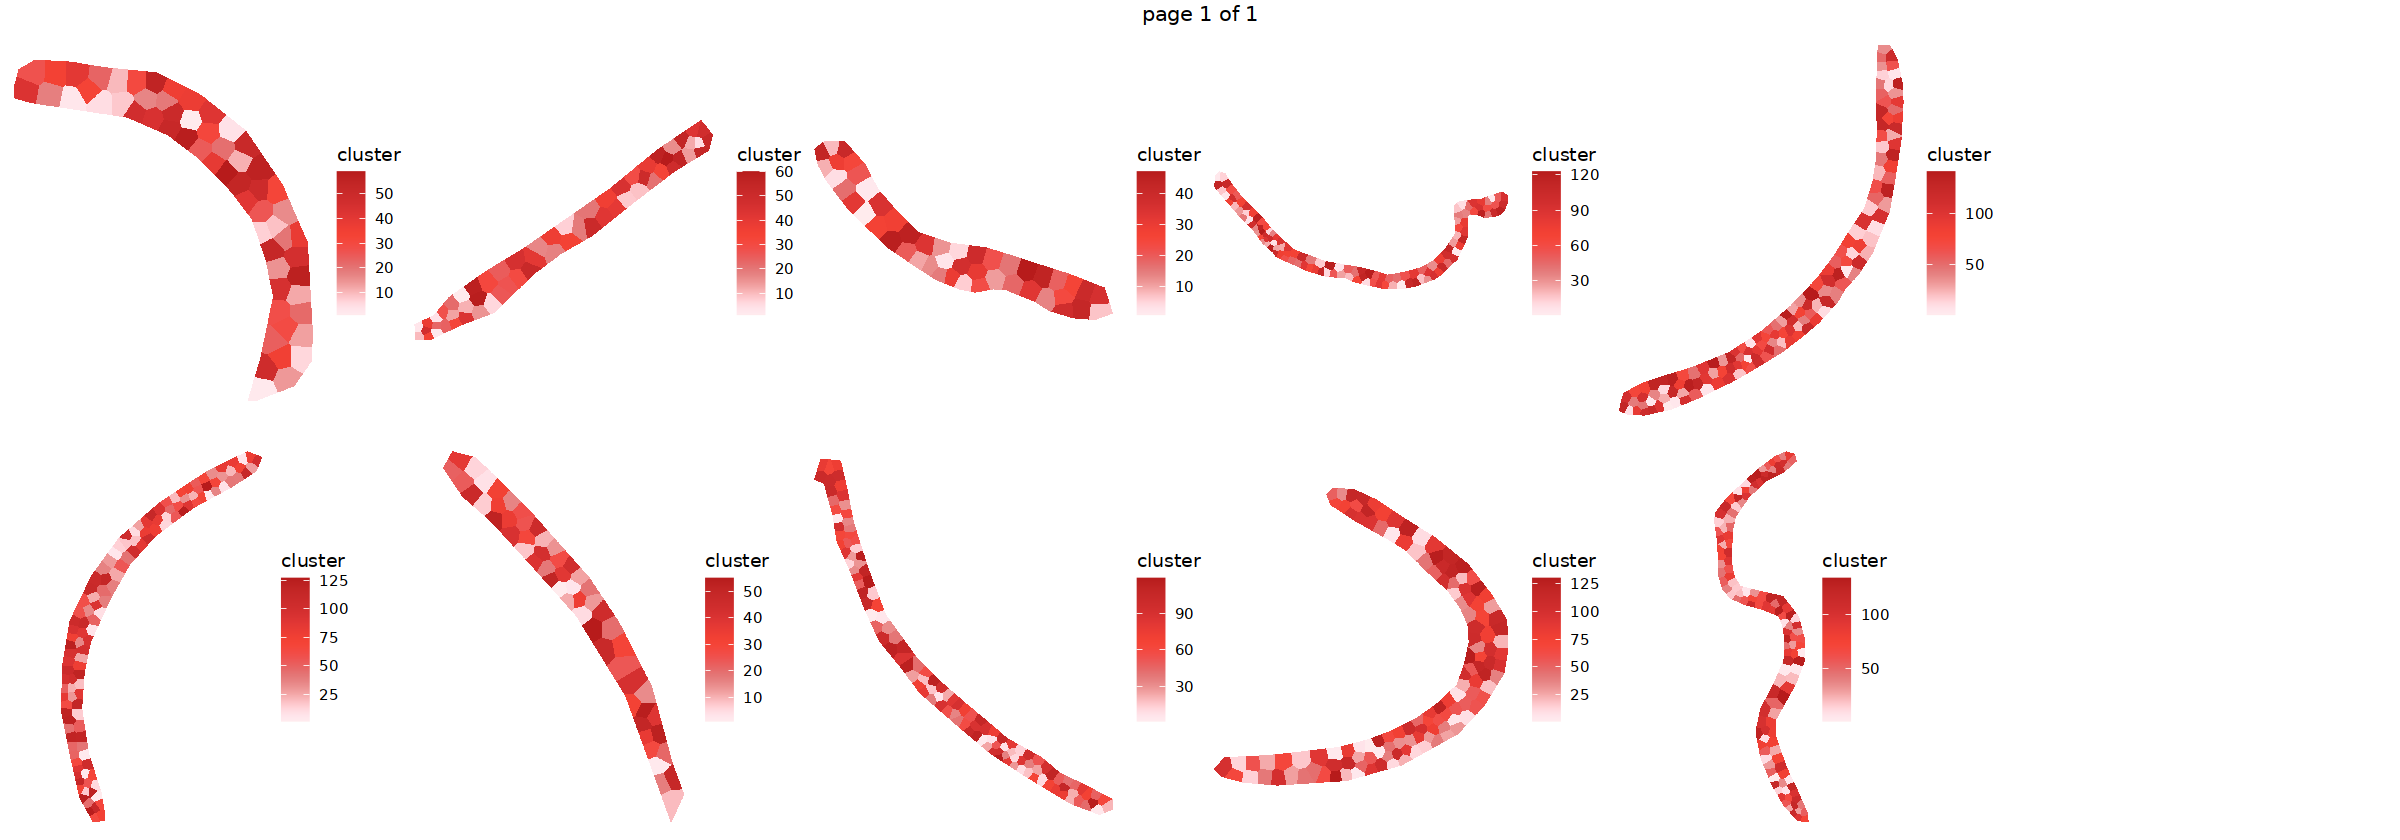

In [47]:
library(ggplot2)
library(gridExtra)
library(grid)
options(repr.plot.width=20)
plotlist1=apply(as.matrix(unique(C5_split$cell)),1,function(xx){
   ggplot(C5_split[C5_split$cell==xx,],aes(x=x,y=y,fill=cluster))+geom_tile()+theme_void()+scale_fill_material("red")+coord_fixed()})
marrangeGrob(plotlist, nrow=2, ncol=6)
pdf("C5_cellMask.pdf",width=15,height=6)
marrangeGrob(plotlist1, nrow=2, ncol=4)
dev.off()

In [50]:
png("C5_cellMask.png",width=15000,height=6000)
marrangeGrob(plotlist1, nrow=2, ncol=4)
dev.off()

[[1]]
NULL


png 
  2

In [31]:
library(ggsci)

[[1]]
NULL


[[1]]
NULL


png 
  2

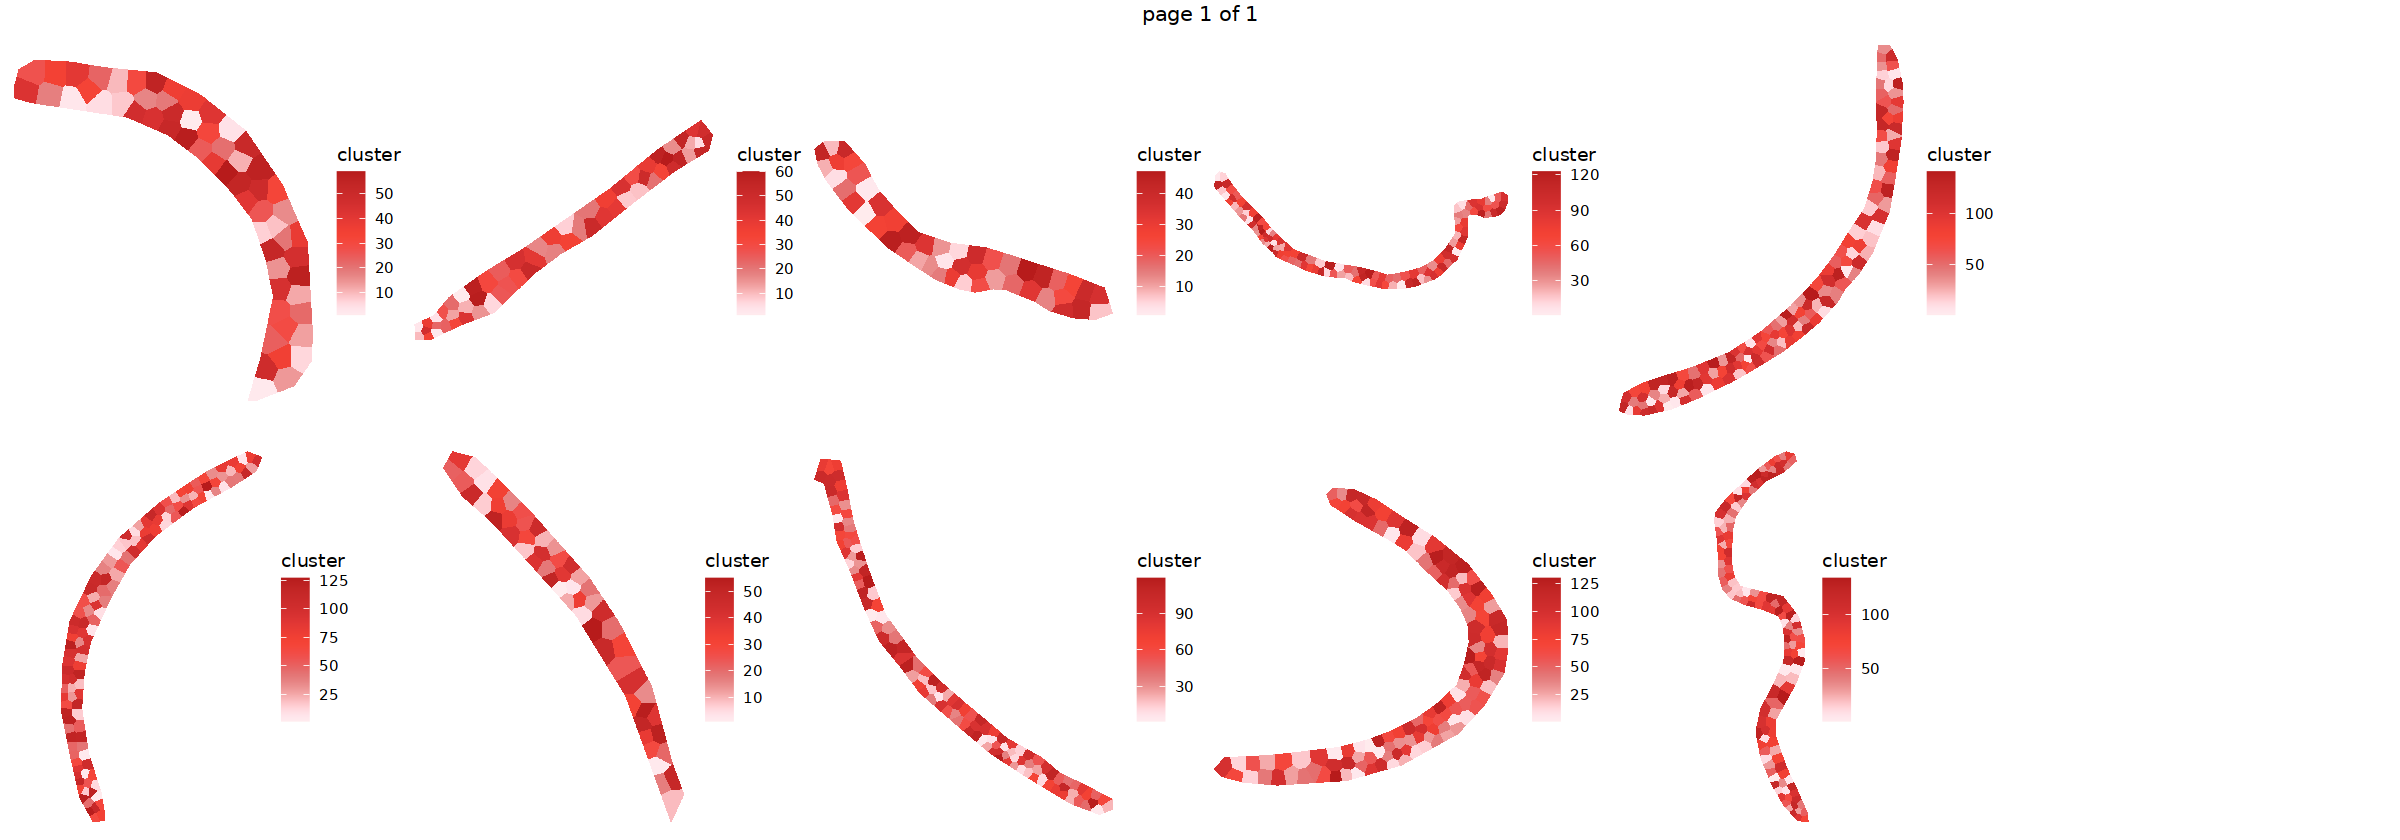

In [46]:
library(ggplot2)
library(gridExtra)
library(grid)
options(repr.plot.width=20)
plotlist=apply(as.matrix(unique(C4_split$cell)),1,function(xx){
   ggplot(C4_split[C4_split$cell==xx,],aes(x=x,y=y,fill=cluster))+geom_tile()+theme_void()+scale_fill_material("red")+coord_fixed()})
marrangeGrob(plotlist, nrow=2, ncol=6)
pdf("C4_cellMask.pdf",width=15,height=5)
marrangeGrob(plotlist, nrow=2, ncol=6)
dev.off()

In [51]:
png("C4_cellMask.png",width=15000,height=5000)
marrangeGrob(plotlist, nrow=2, ncol=6)
dev.off()

[[1]]
NULL


png 
  2

In [30]:
A04231C5=asobj("A04231C5.cell_mask.csv","A04231C5.gem.gz")

[1] 28
[1] 45
[1] 54
[1] 30
[1] 45
[1] 77
[1] 118


Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”
Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: reduction”
Warning message:
“The following arguments are not used: reduction”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 397
Number of edges: 12709

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7341
Number of communities: 6
Elapsed time: 0 seconds


In [31]:
A04232D2=asobj("A04232D2.cell_mask.csv","A04232D2.gem.gz")

[1] 60
[1] 50
[1] 71
[1] 175
[1] 119
[1] 80
[1] 76


Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”
Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: reduction”
Warning message:
“The following arguments are not used: reduction”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 631
Number of edges: 35387

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3780
Number of communities: 5
Elapsed time: 0 seconds


In [32]:
B04252C4=asobj("B04252C4.cell_mask.csv","B04252C4.gem.gz")

[1] 59
[1] 127
[1] 60
[1] 55
[1] 47
[1] 119
[1] 123
[1] 130
[1] 141
[1] 134


Transposing data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.SCT.harmony; see ?make.names for more details on syntax validity”
Computing nearest neighbor graph

Computing SNN

Warning message:
“The following arguments are not used: reduction”
Warning message:
“The following arguments are not used: reduction”


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 995
Number of edges: 44873

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6380
Number of communities: 7
Elapsed time: 0 seconds


In [41]:
saveRDS(A04231C5,"A04231C5.rds")
saveRDS(A04232D2,"A04232D2.rds")
saveRDS(B04252C4,"B04252C4.rds")

In [38]:
markers_C5=FindAllMarkers(A04231C5)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [1]:
options(repr.plot.width=19,repr.plot.height=7)
DimPlot(A04231C5)+ggthemes::scale_color_tableau("Tableau 20") | DimPlot(A04232D2)+ggthemes::scale_color_tableau("Tableau 20") |DimPlot(B04252C4)+ggthemes::scale_color_tableau("Tableau 20") 

ERROR: Error in DimPlot(A04231C5): could not find function "DimPlot"


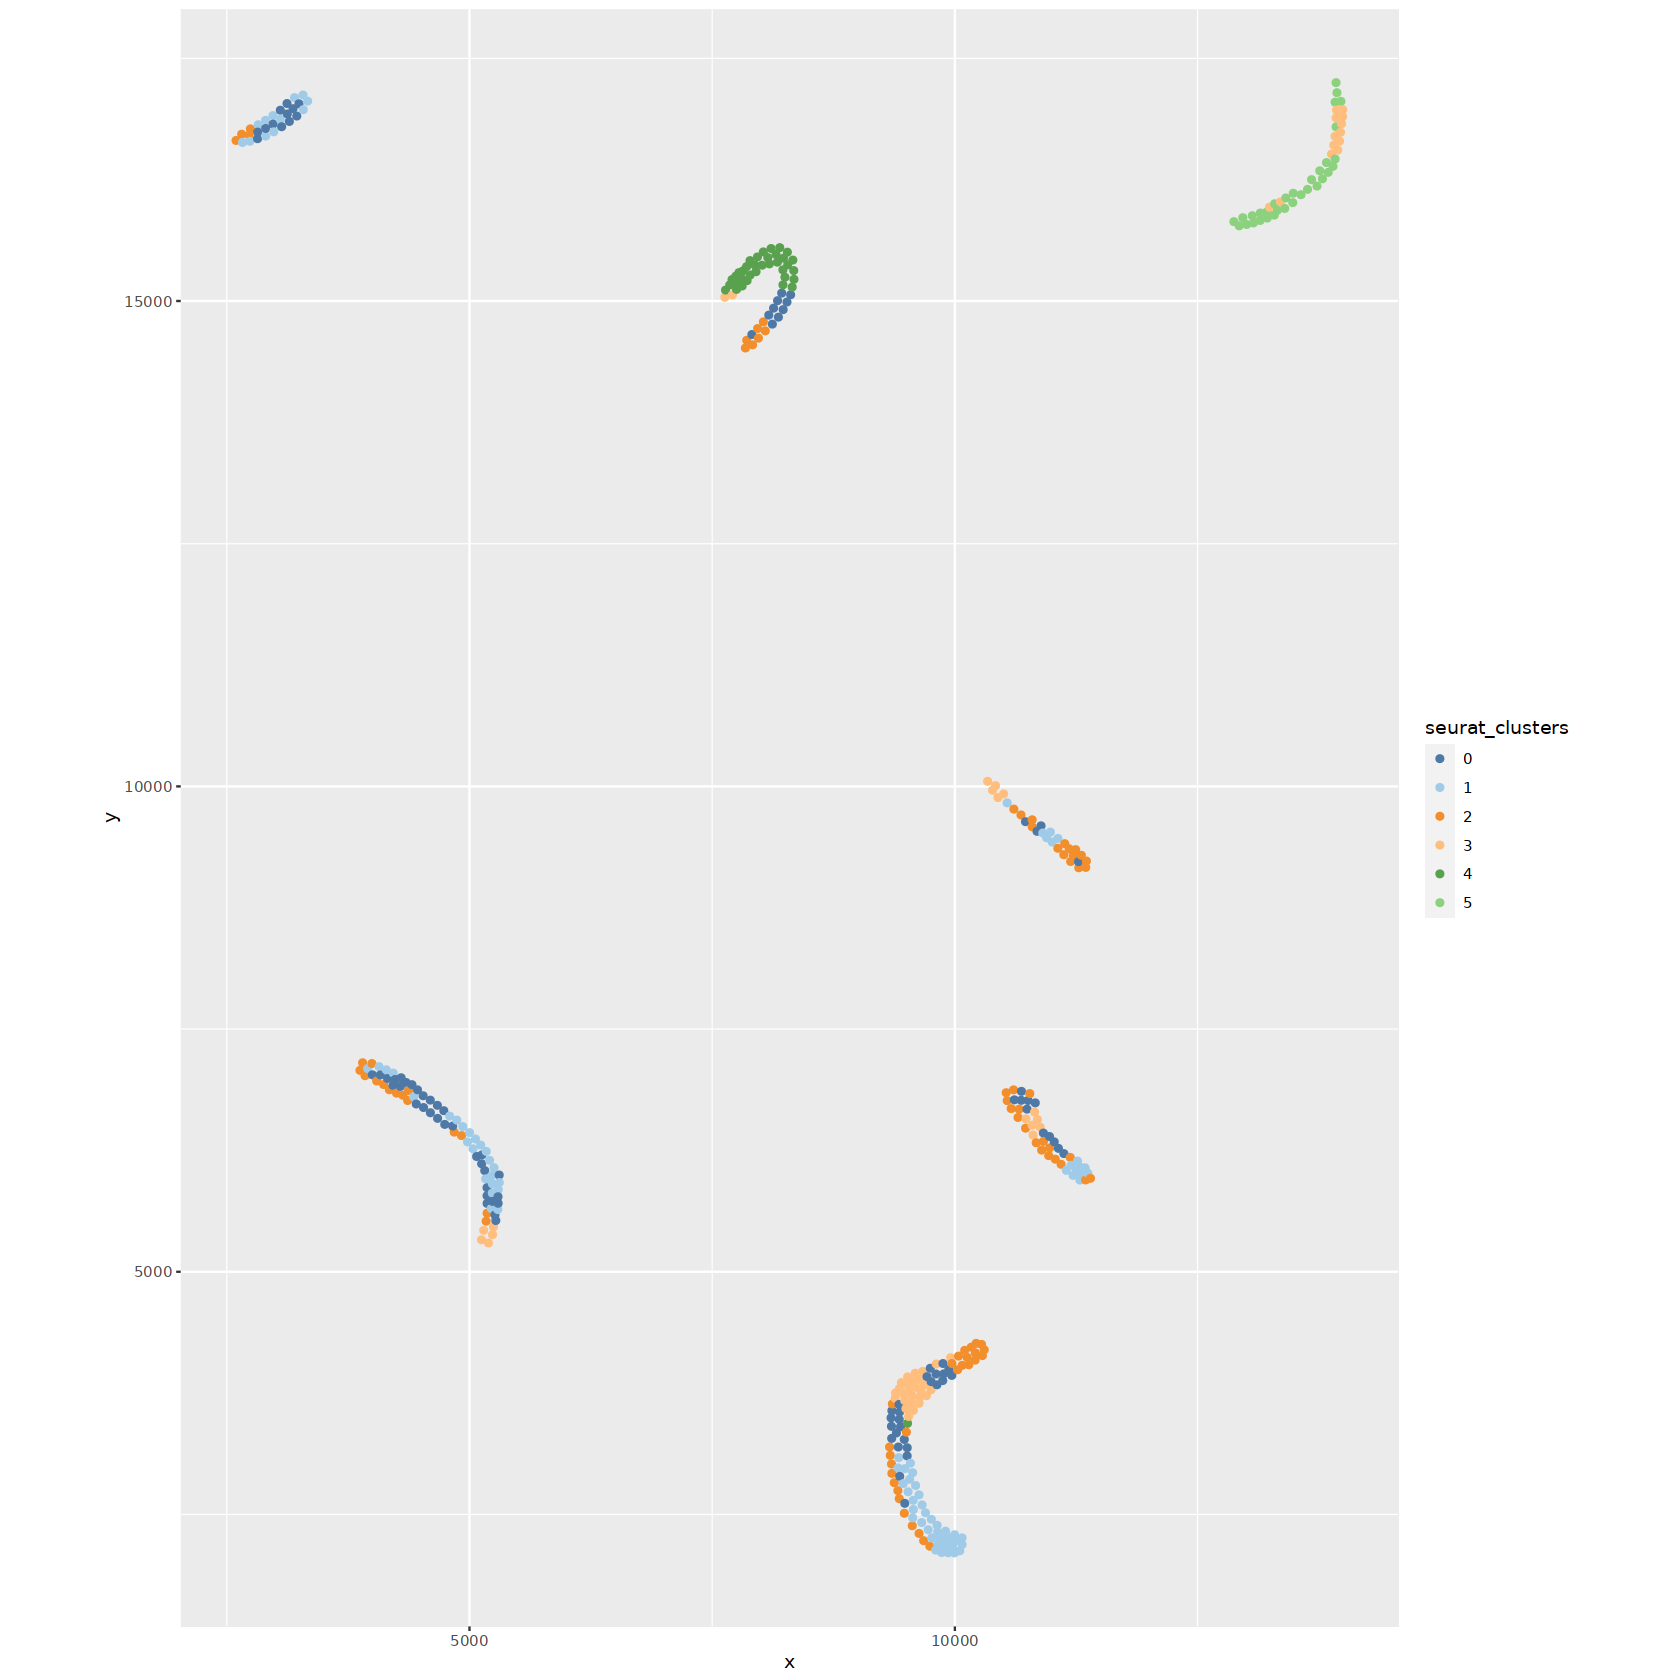

In [37]:
obj=A04231C5
options(repr.plot.width=14,repr.plot.height=14)
ggplot(obj@meta.data,aes(x,y,color=seurat_clusters))+geom_point()+coord_fixed()+ggthemes::scale_color_tableau("Tableau 20")

In [170]:
obj$annotation="muscle"
obj$annotation[obj$seurat_clusters==5]="Myotendinous junction"
obj$annotation[obj$seurat_clusters==6]="Myoneural junction"
obj$annotation[obj$seurat_clusters==4]="Lama2"

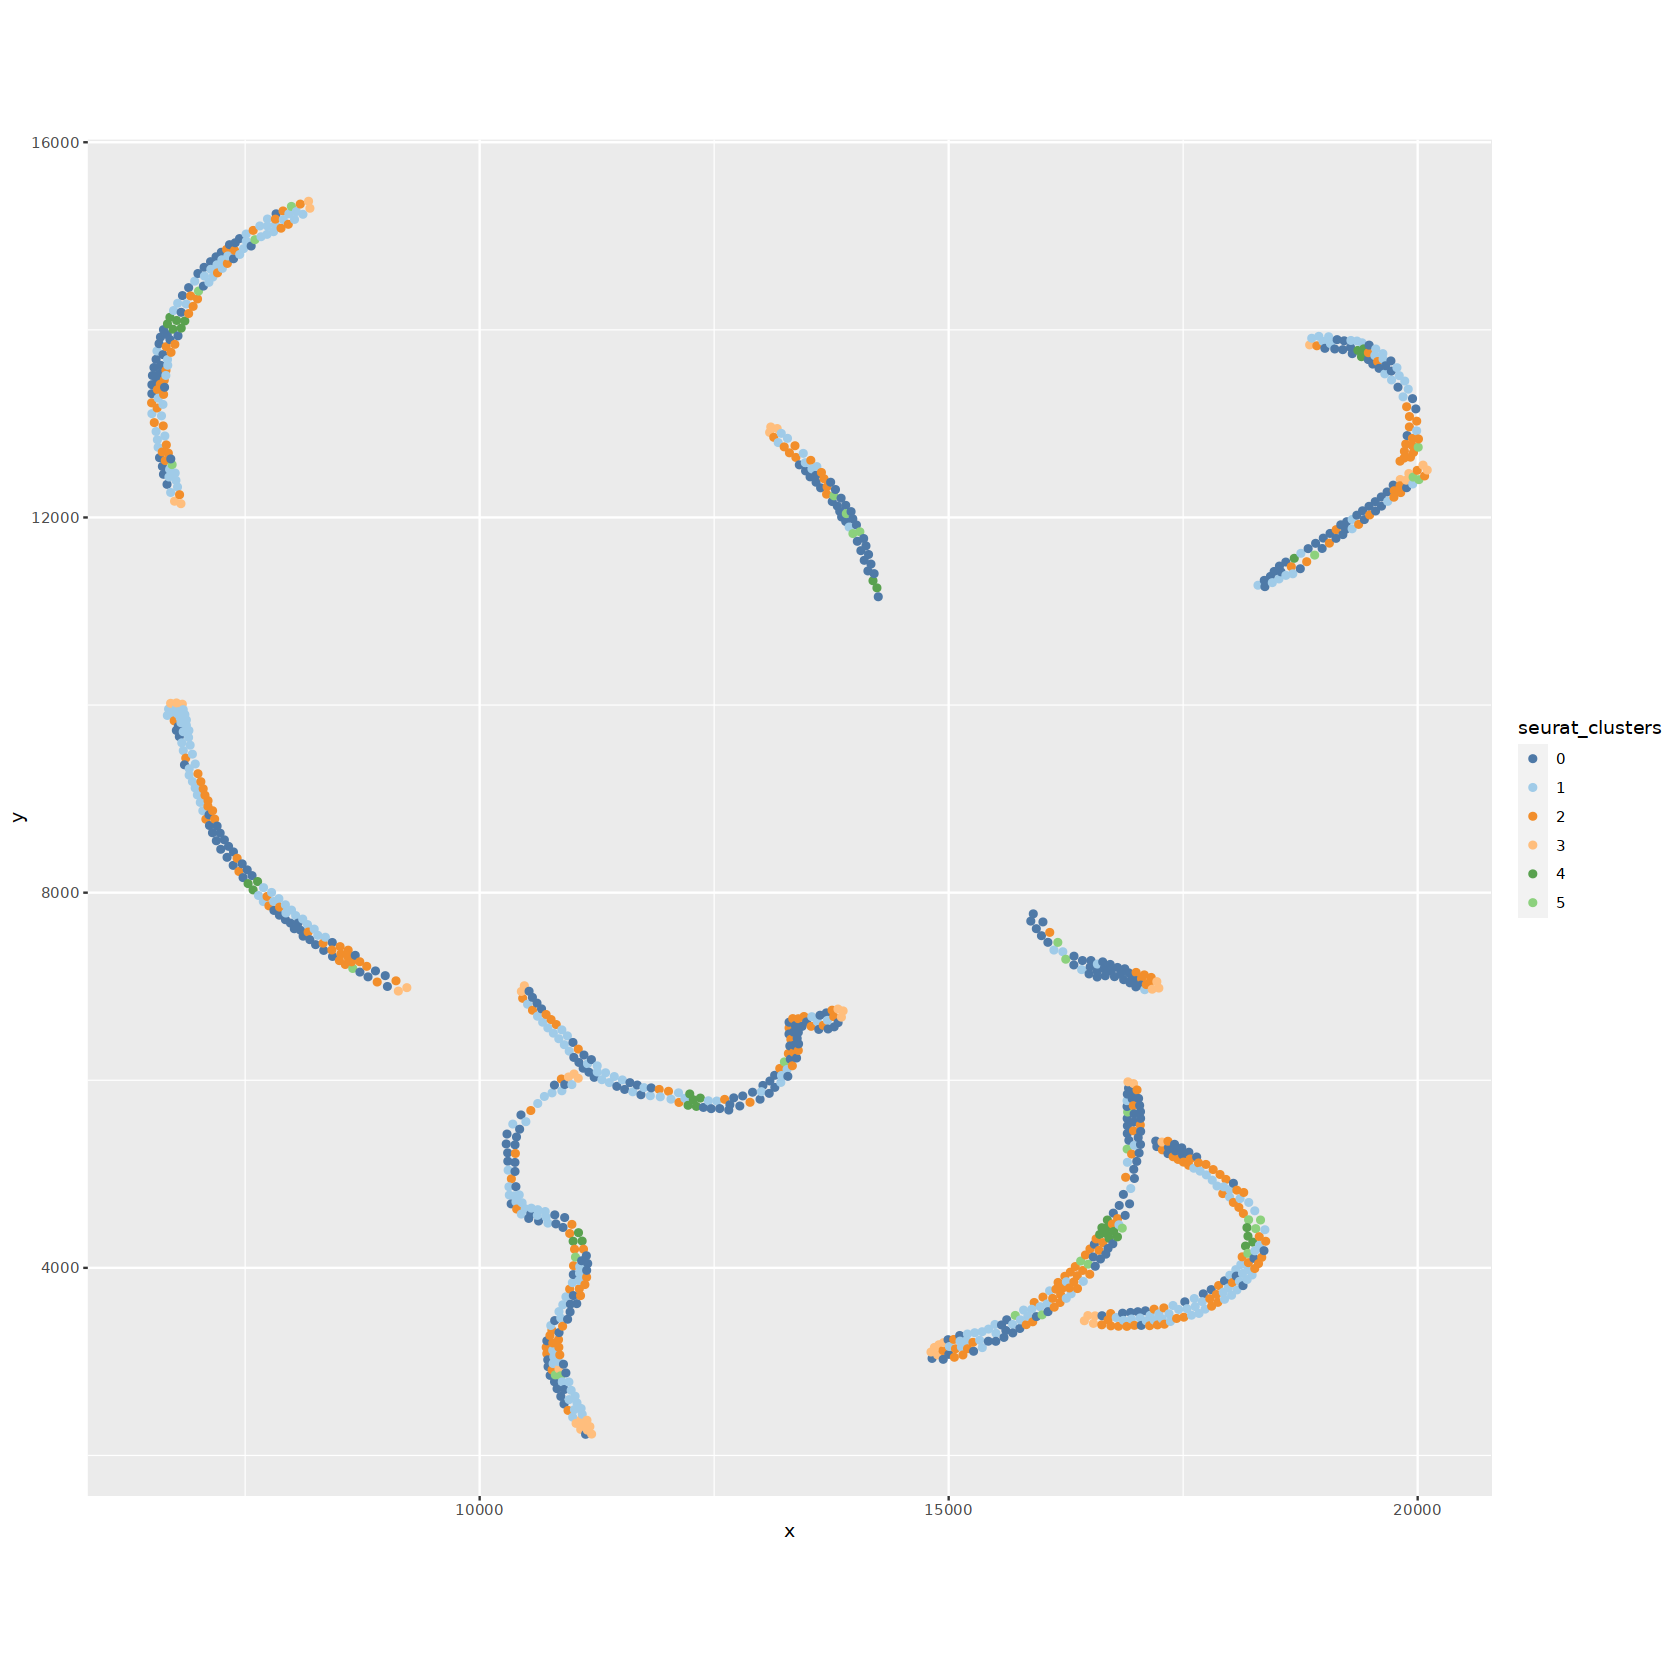

In [23]:
obj=B04252C4
options(repr.plot.width=14,repr.plot.height=14)
ggplot(obj@meta.data,aes(x,y,color=seurat_clusters))+geom_point()+coord_fixed()+ggthemes::scale_color_tableau("Tableau 20")

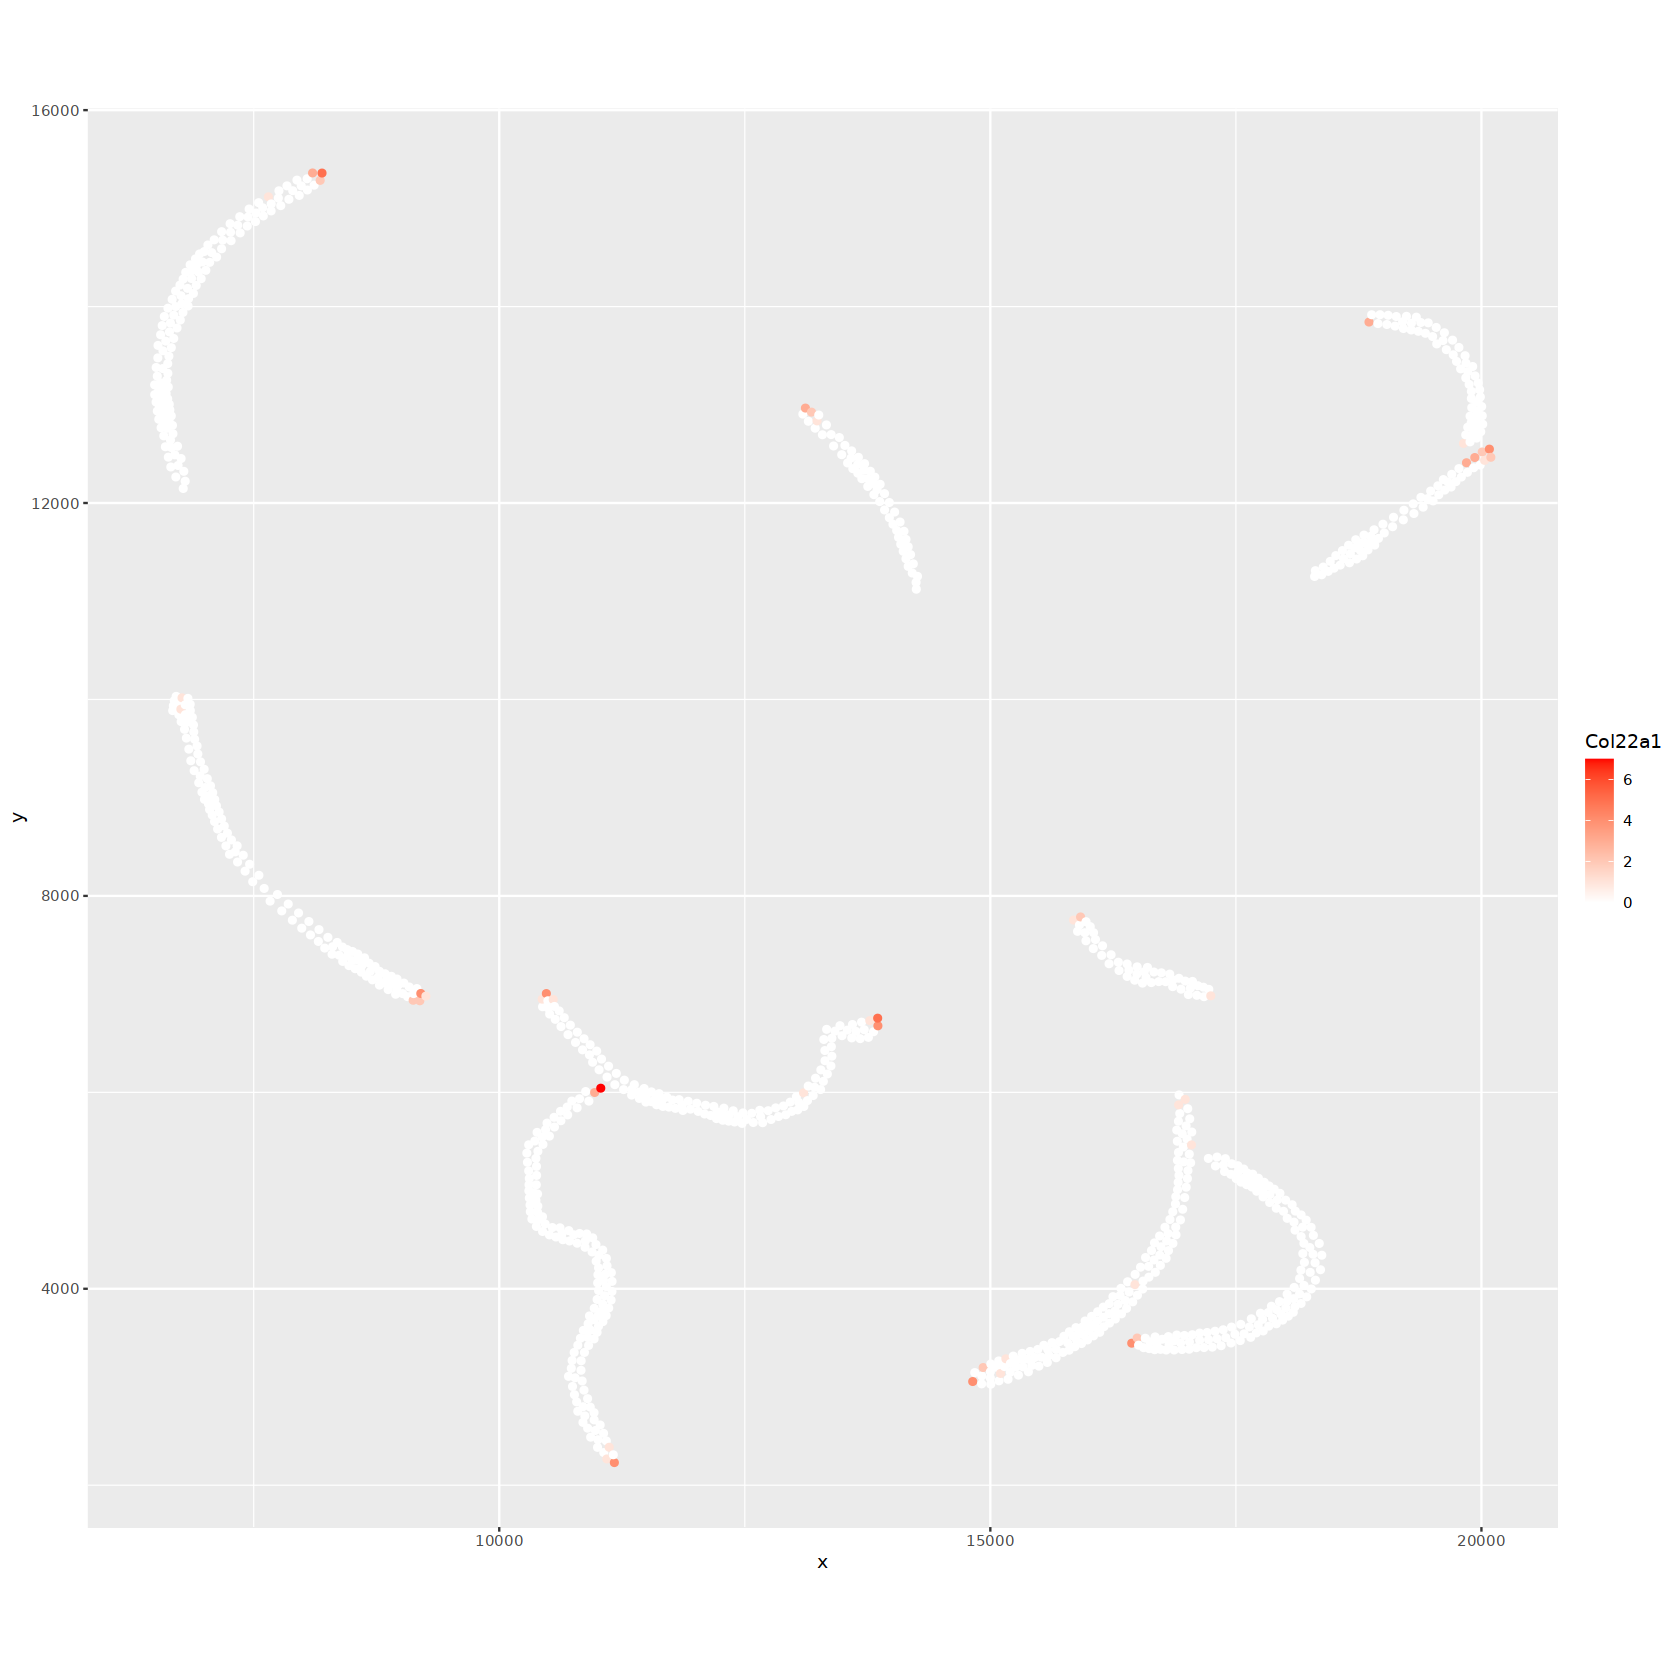

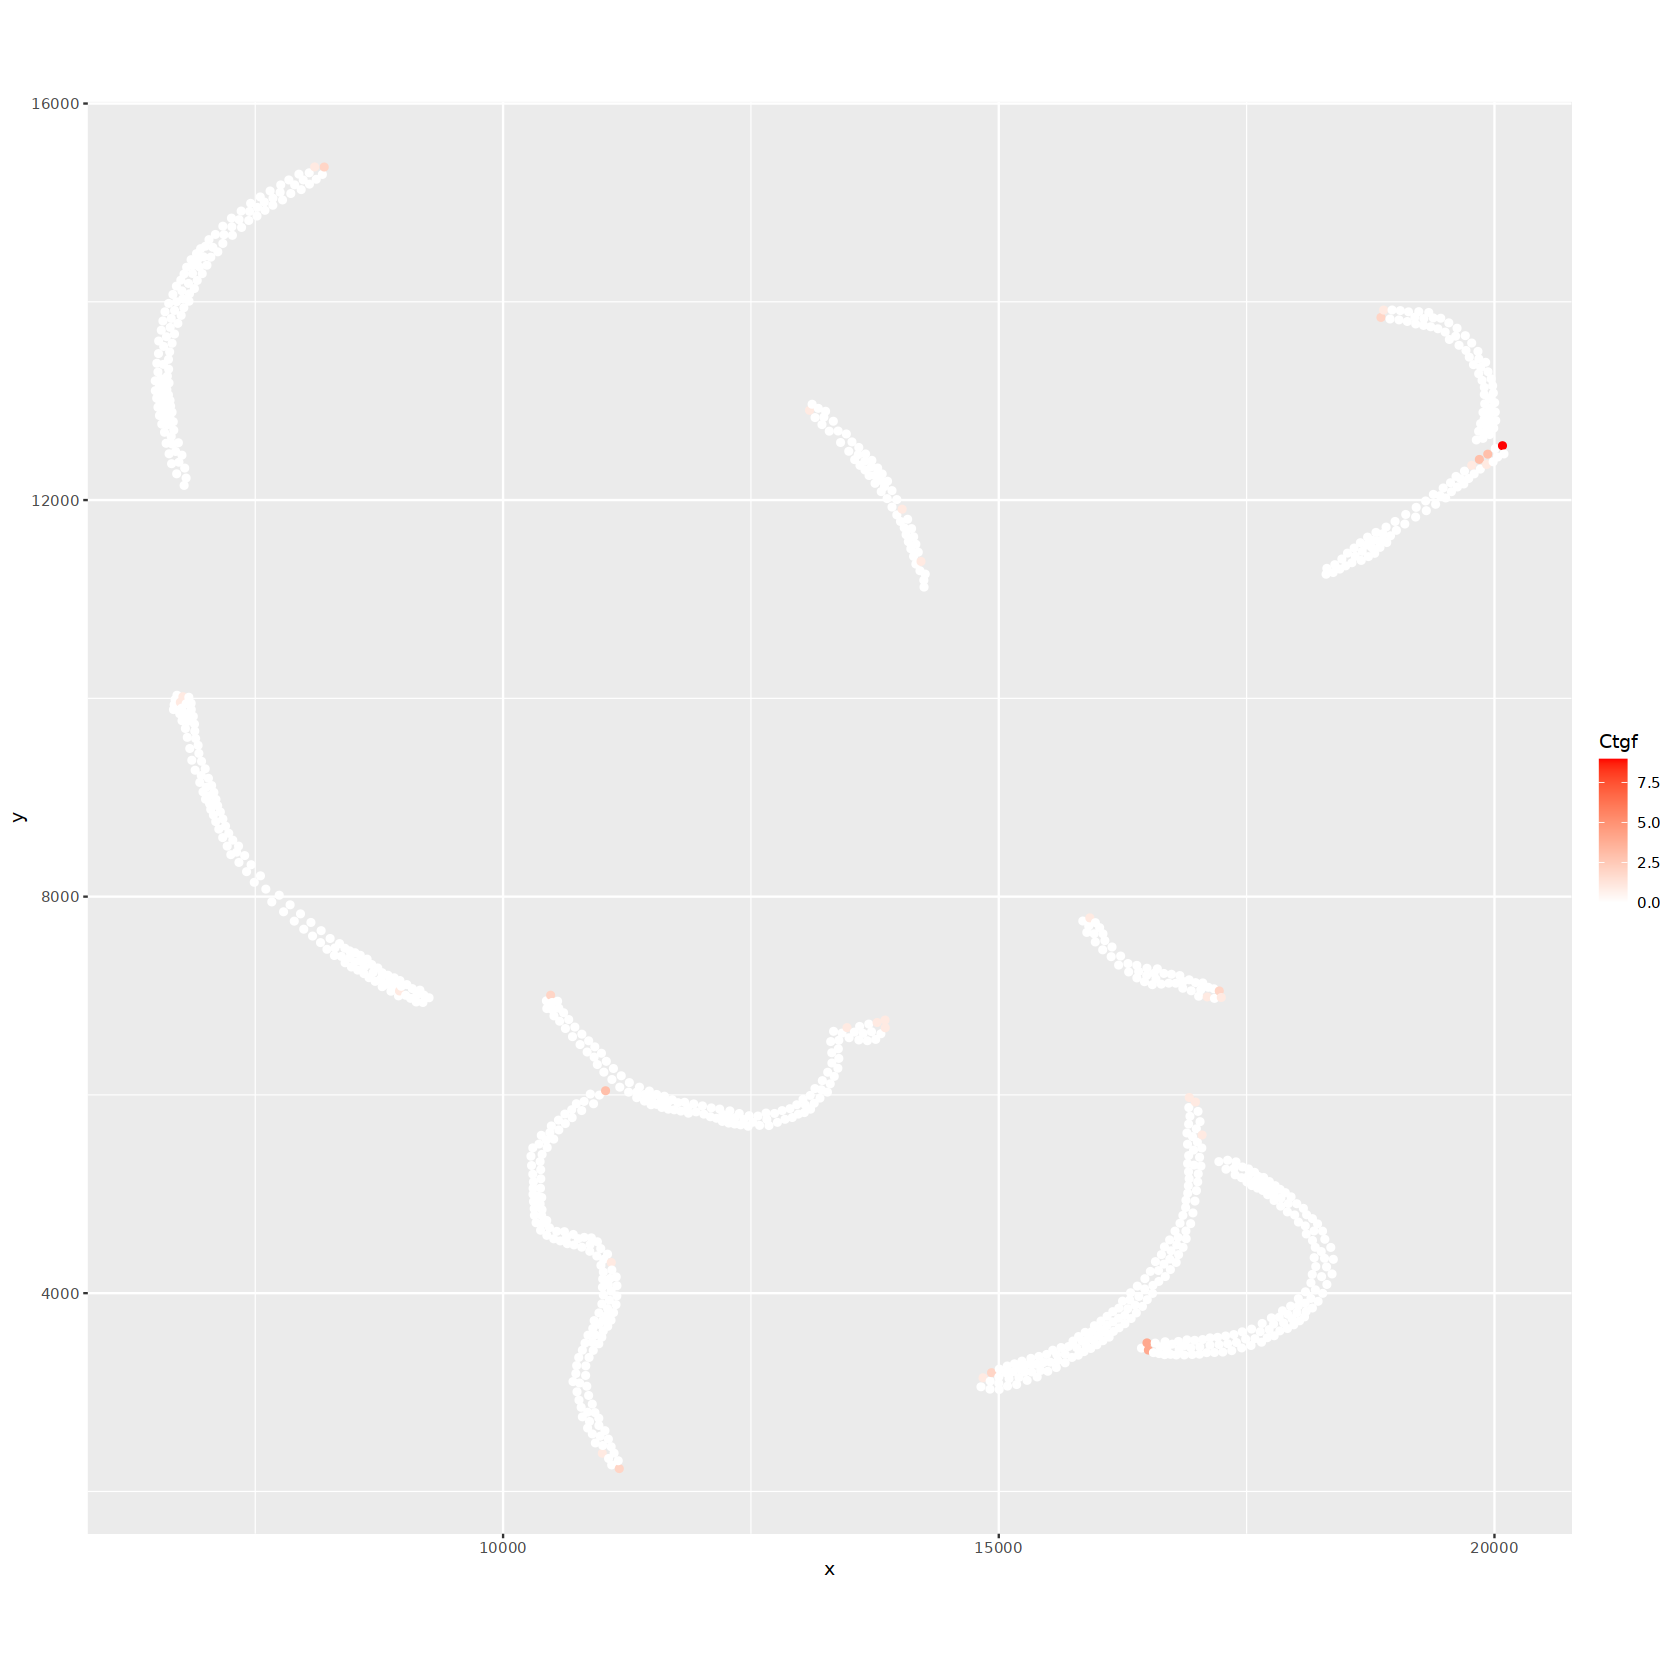

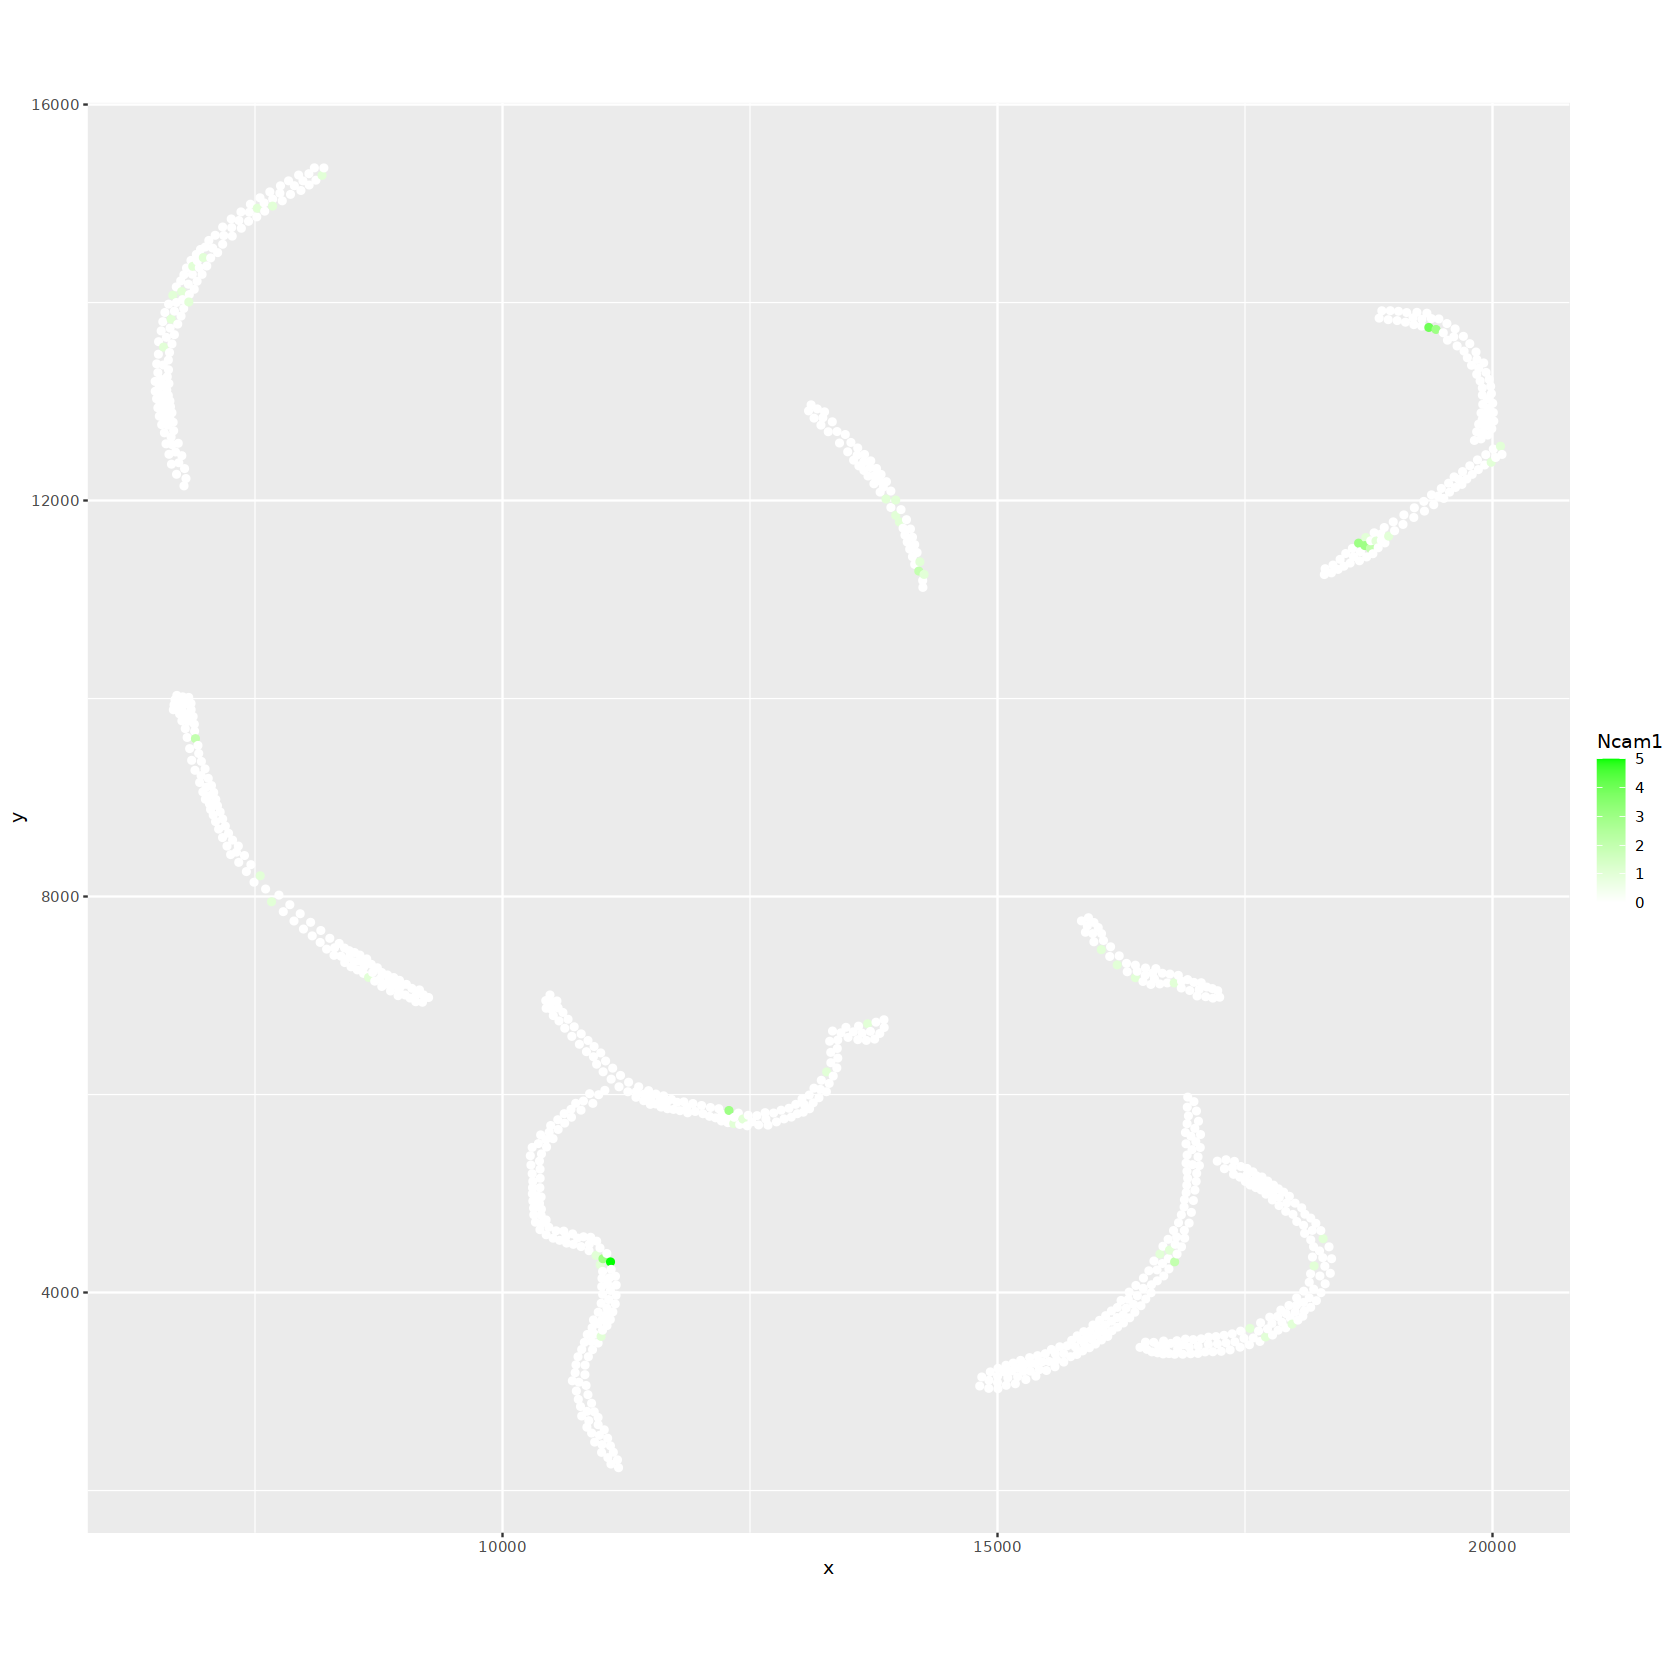

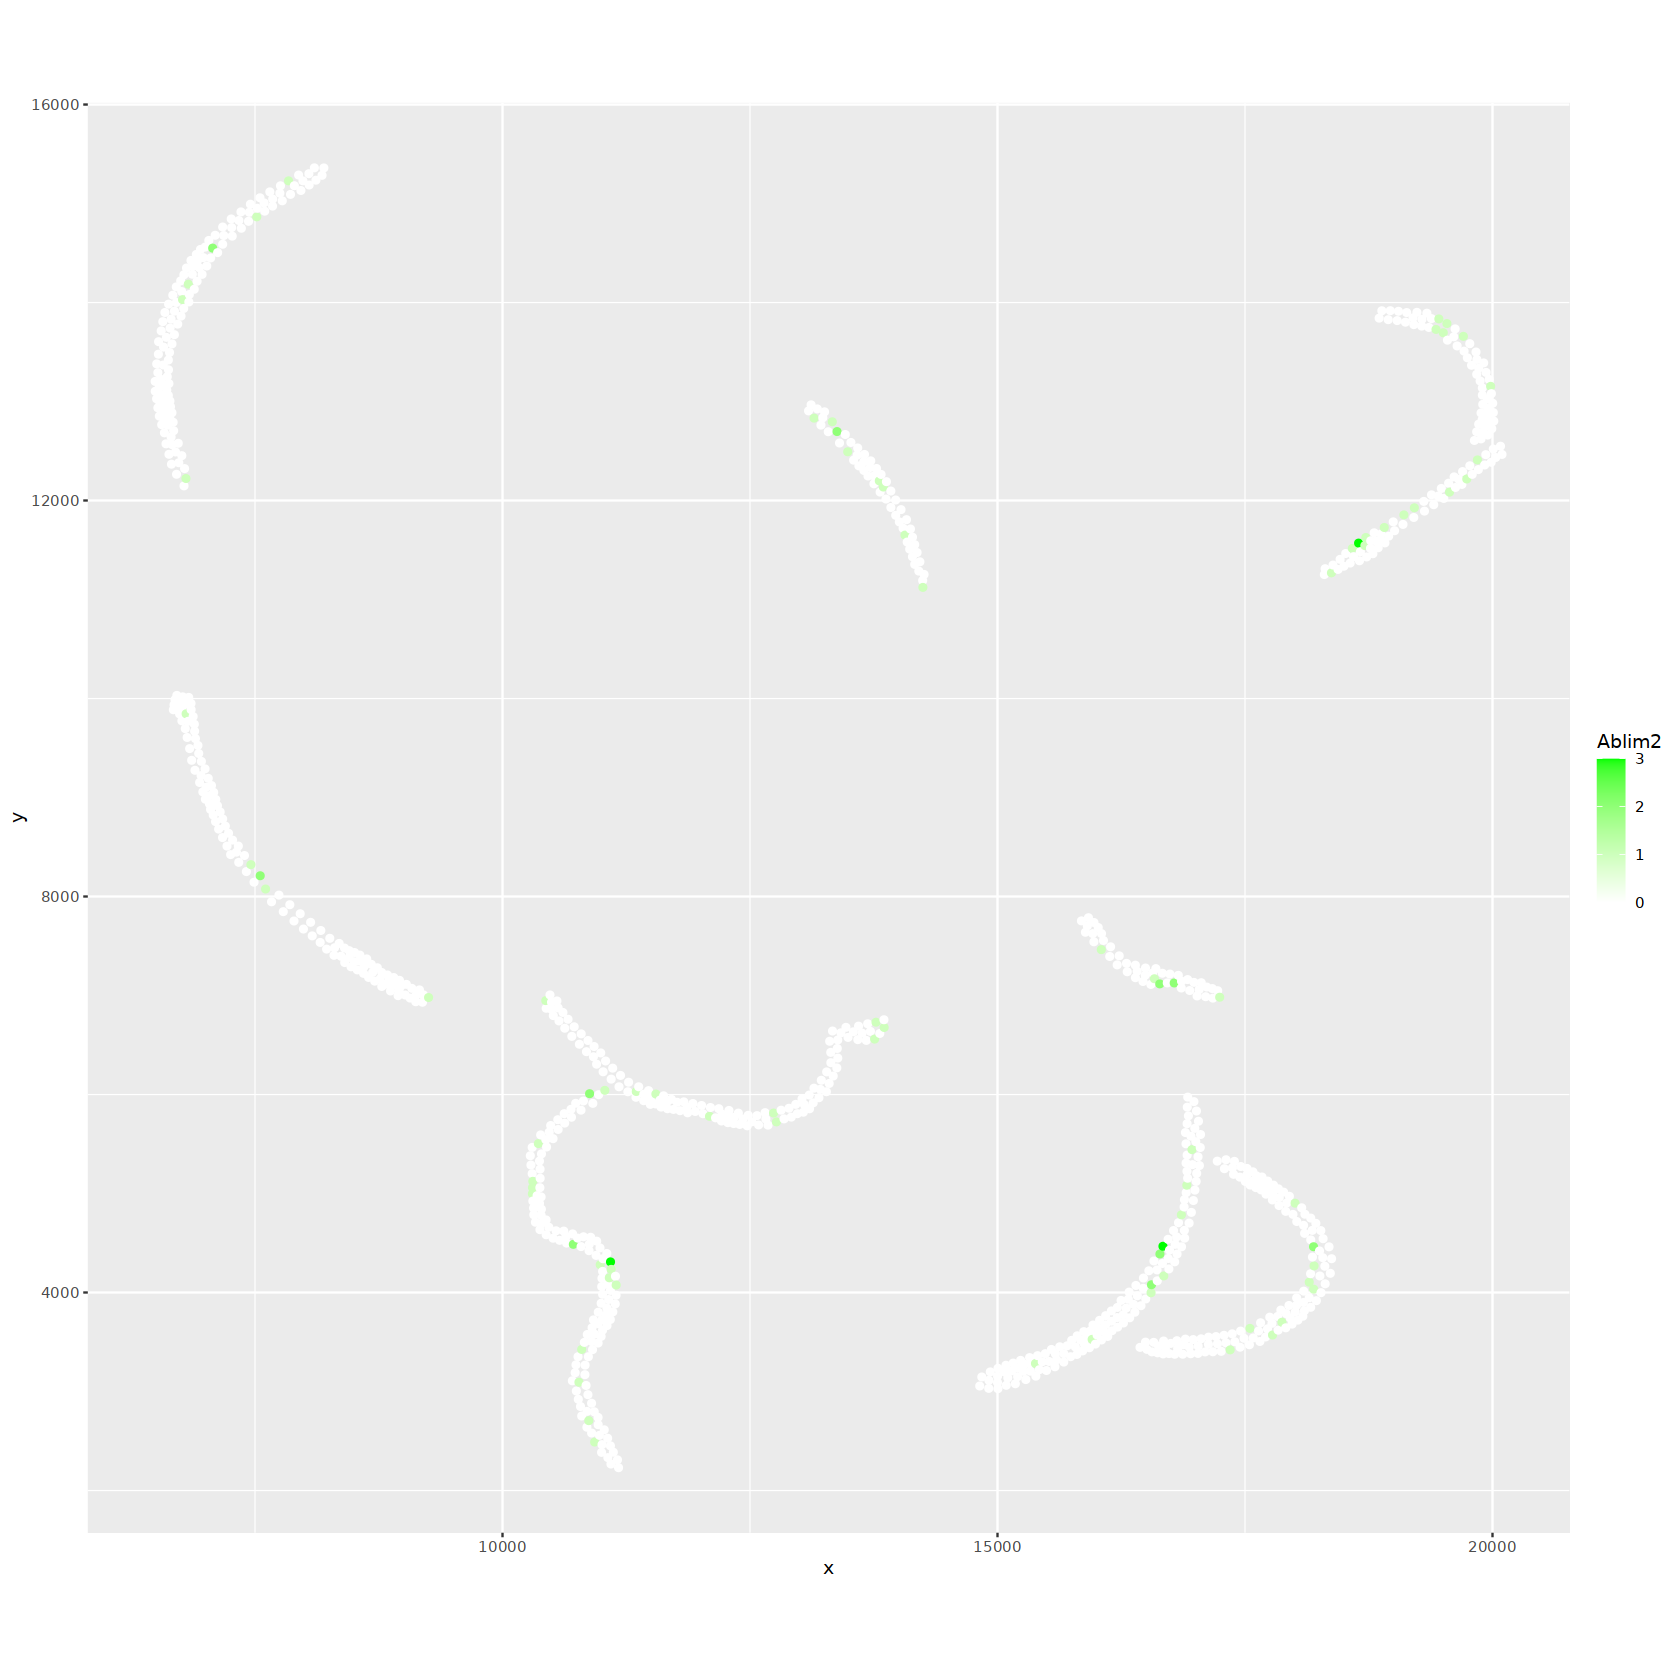

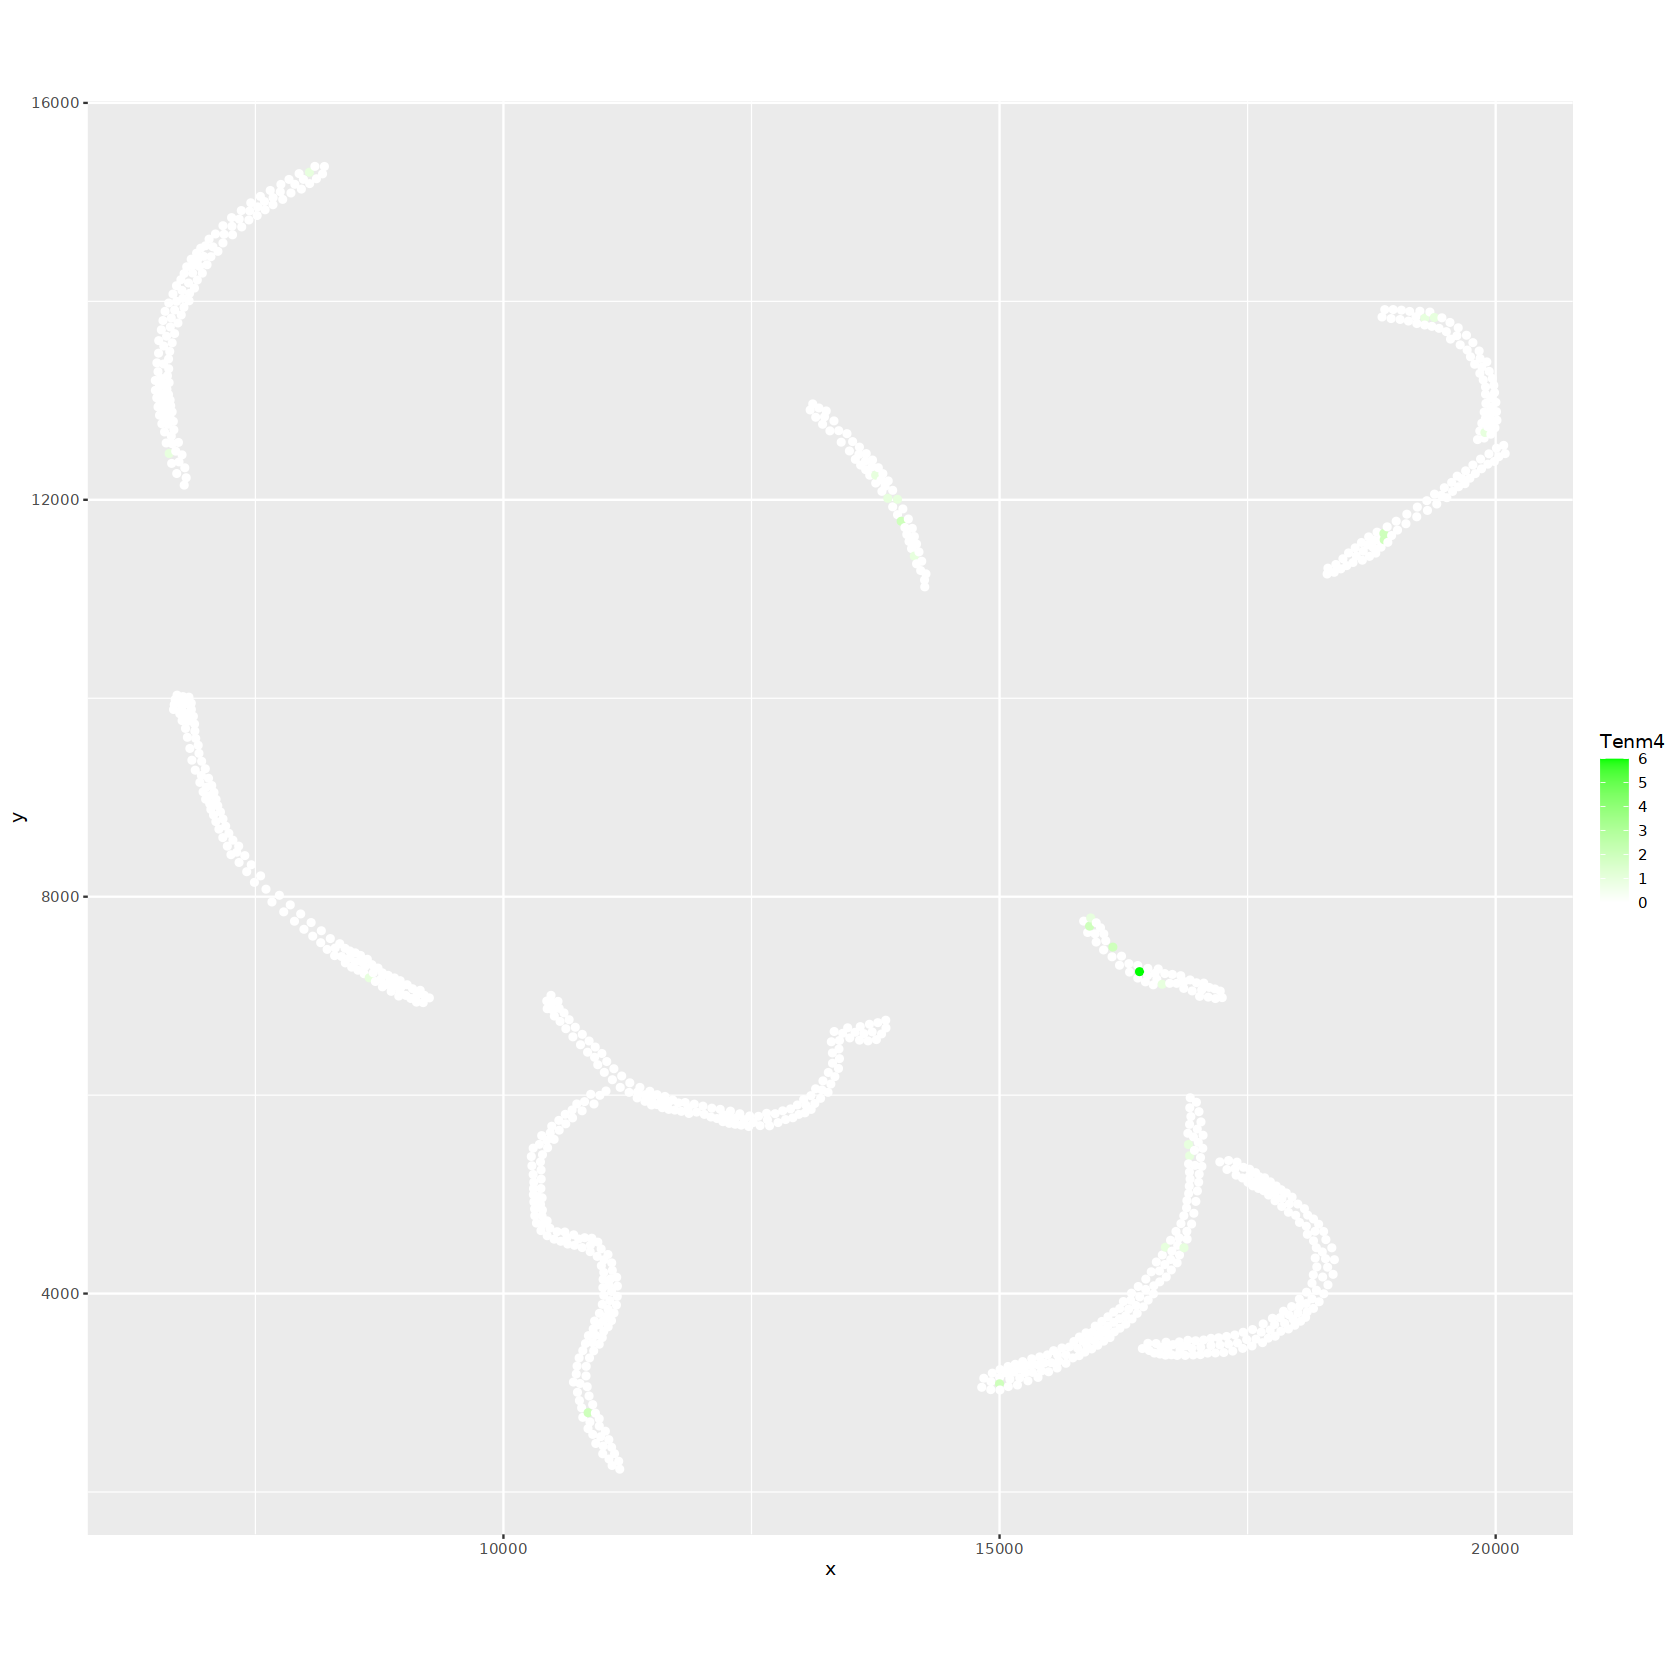

In [14]:
obj=B04252C4
library(ggplot2)
options(repr.plot.width=14,repr.plot.height=14)
ggplot(obj@meta.data,aes(x,y,color=obj@assays$RNA@counts["Col22a1",]))+geom_point()+coord_fixed()+scale_color_gradientn(colors=c("white","red"))+labs(color="Col22a1")
ggplot(obj@meta.data,aes(x,y,color=obj@assays$RNA@counts["Ctgf",]))+geom_point()+coord_fixed()+scale_color_gradientn(colors=c("white","red"))+labs(color="Ctgf")
ggplot(obj@meta.data,aes(x,y,color=obj@assays$RNA@counts["Ncam1",]))+geom_point()+coord_fixed()+scale_color_gradientn(colors=c("white","green"))+labs(color="Ncam1")
ggplot(obj@meta.data,aes(x,y,color=obj@assays$RNA@counts["Ablim2",]))+geom_point()+coord_fixed()+scale_color_gradientn(colors=c("white","green"))+labs(color="Ablim2")
ggplot(obj@meta.data,aes(x,y,color=obj@assays$RNA@counts["Tenm4",]))+geom_point()+coord_fixed()+scale_color_gradientn(colors=c("white","green"))+labs(color="Tenm4")

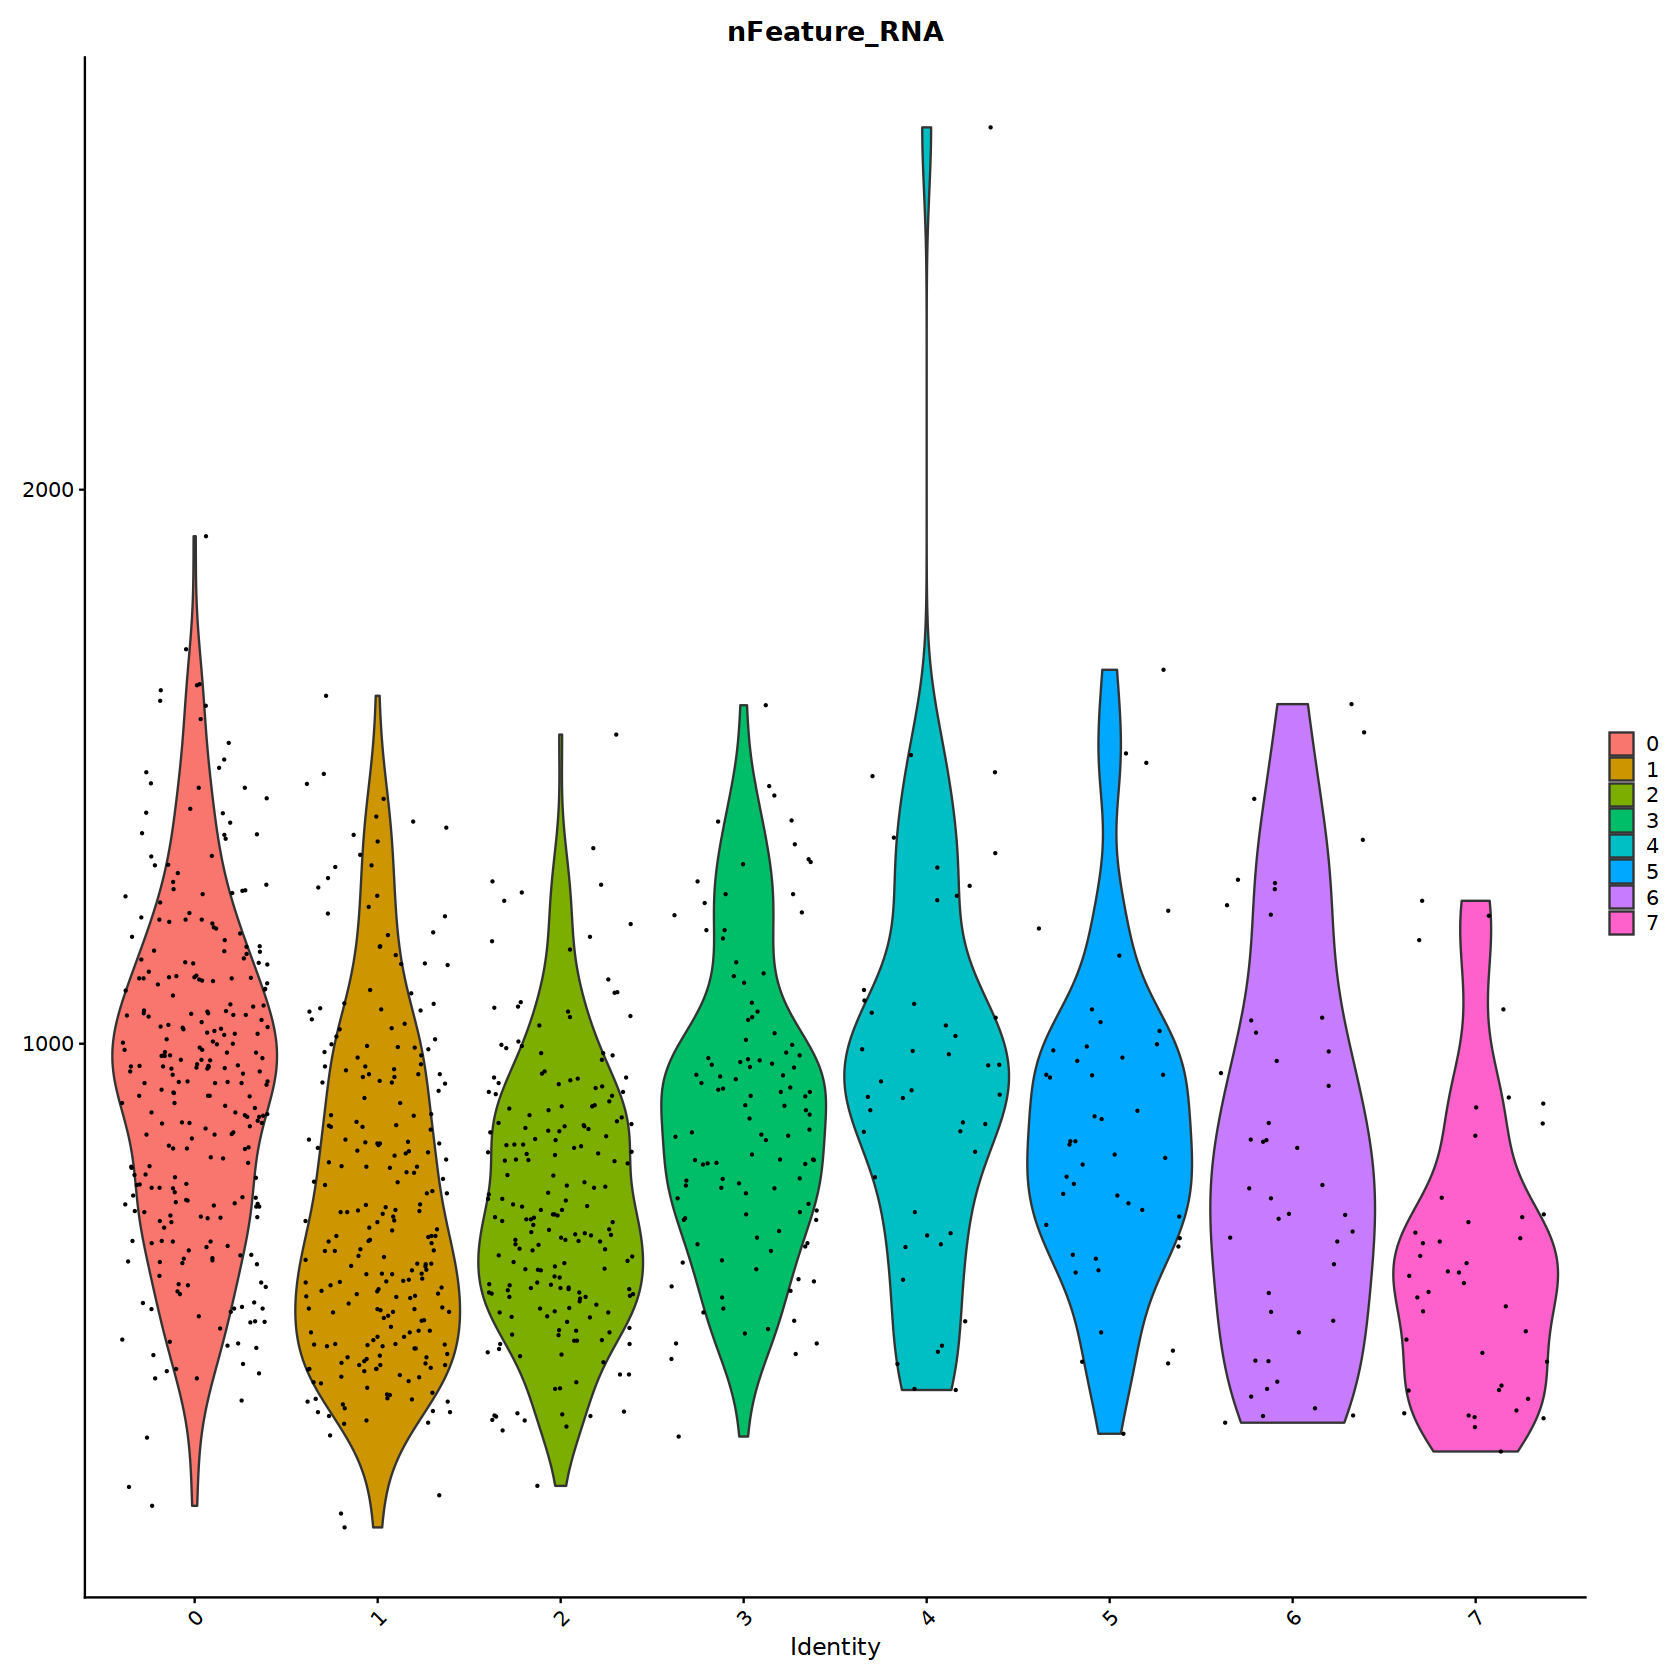

In [167]:
VlnPlot(obj,c("nFeature_RNA"))